# Project 8 Avocado dataset prediction
--> Aim to find the Best Average price and which city is to be consumed the most number of Avocado

## Lets Load the common libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## Lets Load the data

In [47]:
data=pd.read_csv("avocado.csv")
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,12/27/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,12/20/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,12/13/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,12/6/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,11/29/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


## Information about the data
-Date - The date of the observation

-AveragePrice - the average price of a single avocado

-type - conventional or organic

-year - the year

-Region - the city or region of the observation

-Total Volume - Total number of avocados sold

-4046 - Total number of avocados with PLU 4046 sold

-4225 - Total number of avocados with PLU 4225 sold

-4770 - Total number of avocados with PLU 4770 sold

-Total Bags - Total number of bags delivered in each region

-Small Bags - Total number of small bags delivered in each region

-Large Bags - Total number of large bags delivered in each region

-Unnamed: 0 - Id

-XLarge Bags - Total number of Xtralarge bags delivered in each region

In [48]:
data['Date']=pd.to_datetime(data['Date'])

## Lets check the null values

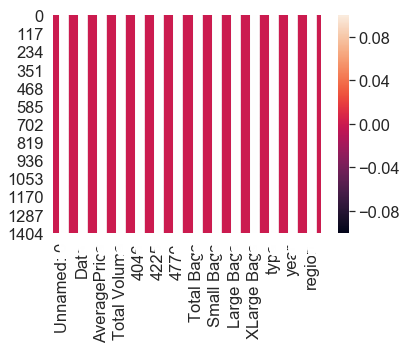

In [49]:
sns.heatmap(data.isnull(), annot=True)

In [80]:
data.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
year            0
region          0
dtype: int64

From the above we can see that there are no null values

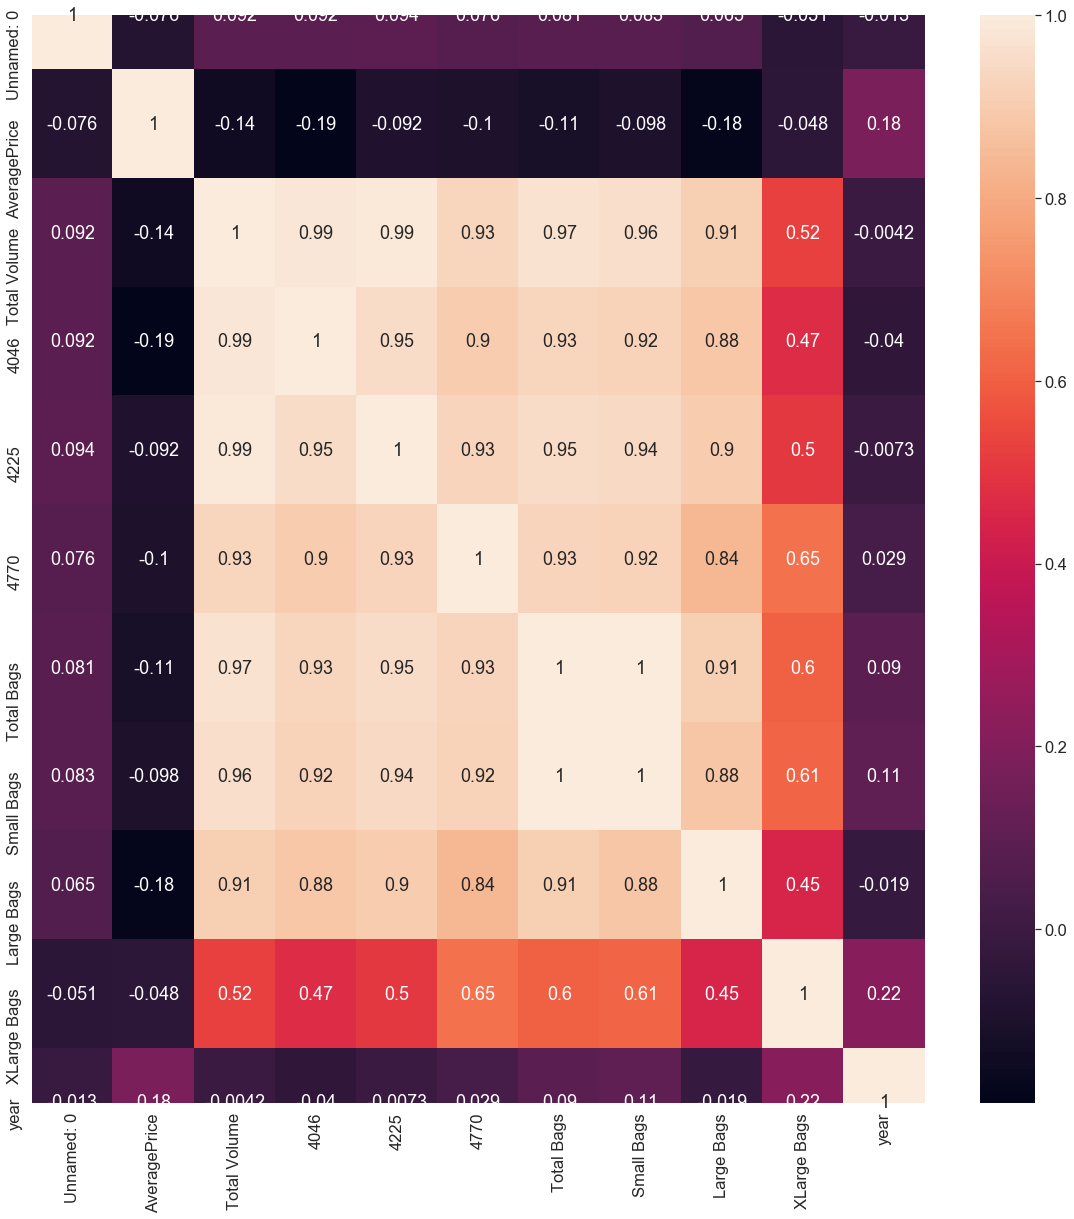

In [50]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)

From the map we can see that the total volume, 4046,4225,4770,Total Bags, Small Bags,Large Bags are highly correlated with each other.

In [51]:
data['type'].unique()

array(['conventional'], dtype=object)

In [52]:
## Lets remove the uncessary colums as all fruits are of one type, and unnamed is not a required feild 
data.drop(['Unnamed: 0'],axis=1,inplace=True)
data.drop(['type'],axis=1,inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025DEFF8DB48>,
      dtype=object)

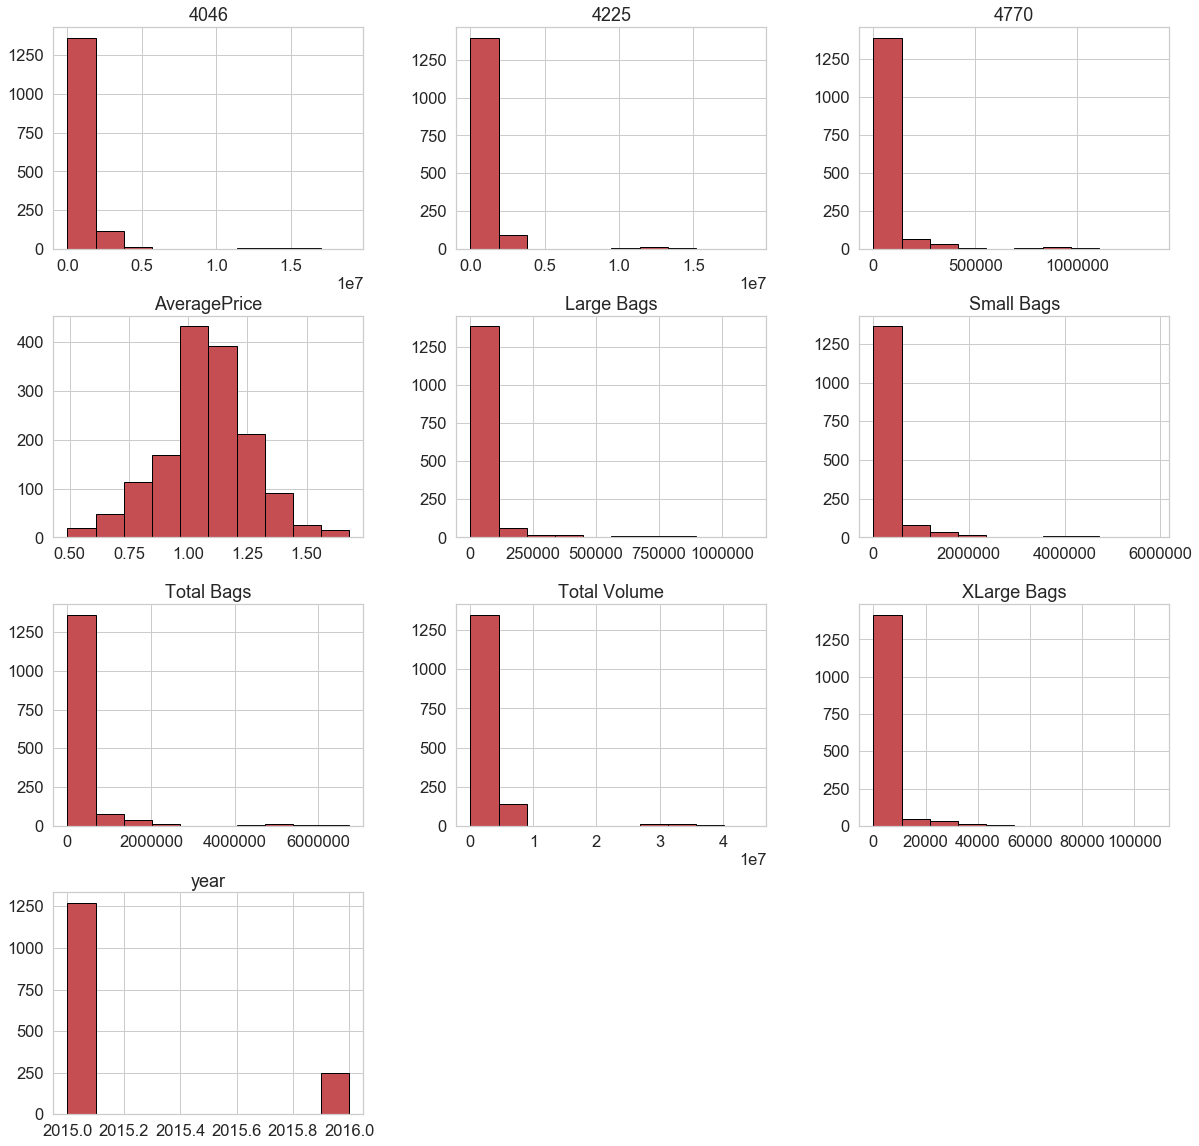

In [53]:
sns.set(style='whitegrid', palette="deep", font_scale=1.5)
data.hist(figsize=(20,20),color='r', edgecolor='black',linewidth=1)

From the above we can see that most of features are postively skewed. 

In [54]:
data.skew()

AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
year            1.828332
dtype: float64

In [55]:
for index in data.skew().index:
    if data.skew().loc[index]>0.55:
        data[index]=np.cbrt(data[index])

In [56]:
data.skew()

AveragePrice   -0.109444
Total Volume    2.124006
4046            1.767021
4225            1.775945
4770            1.526943
Total Bags      2.149088
Small Bags      2.143413
Large Bags      1.431704
XLarge Bags     2.000670
year            1.828332
dtype: float64

## Lets Do the EDA

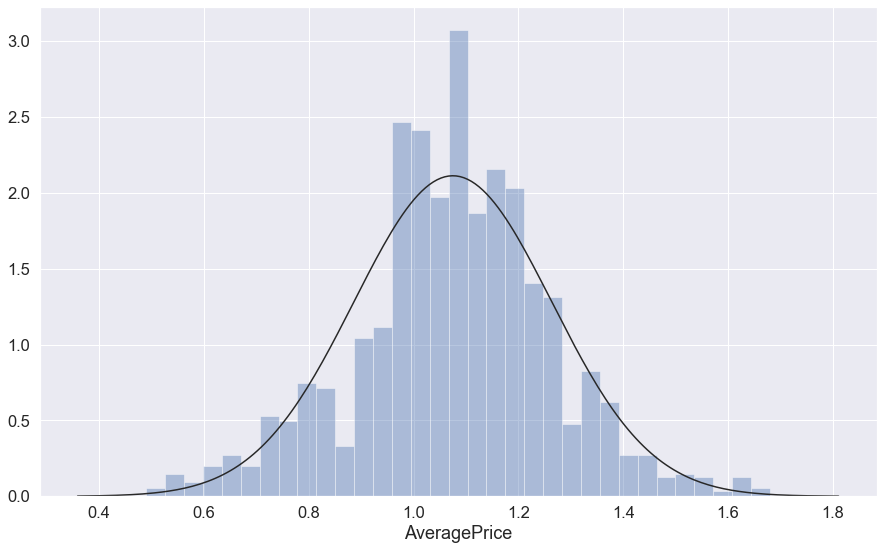

In [93]:
sns.set(font_scale=1.5) 
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(15, 9))
sns.distplot(a=data.AveragePrice, kde=False, fit=norm)

From the above distribution we can see that the price of avocado for most of the times is between 1.0 to 1.2

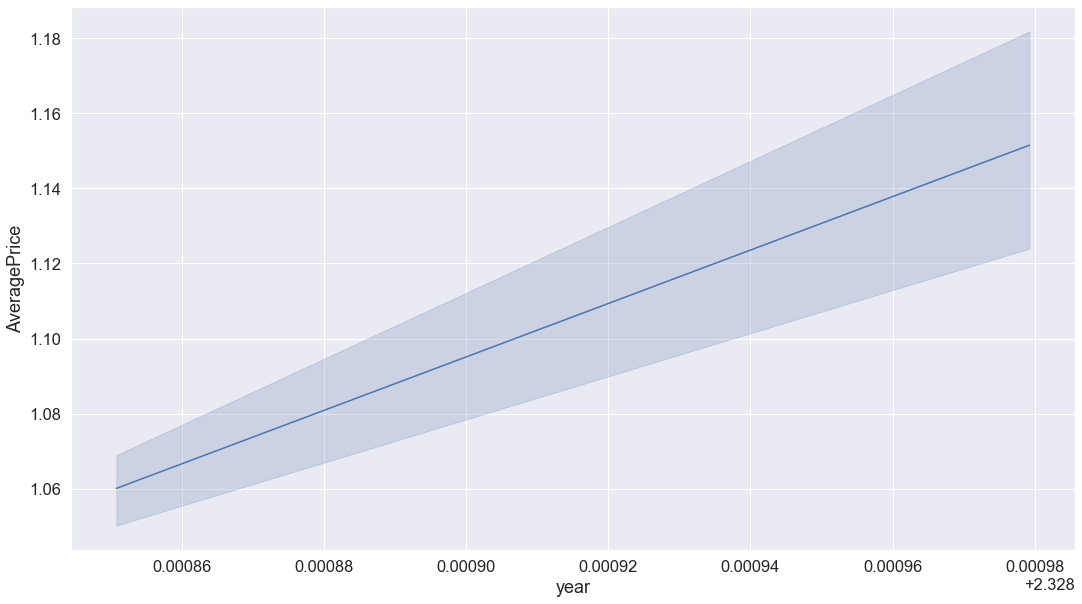

In [94]:
plt.figure(figsize=(18,10))
sns.lineplot(x="year", y="AveragePrice", data=data)
plt.show()

From the above we can see that as year progress the average price of the avocado also increases

Text(0.5, 1.0, 'Average Price of Avocado According to Region')

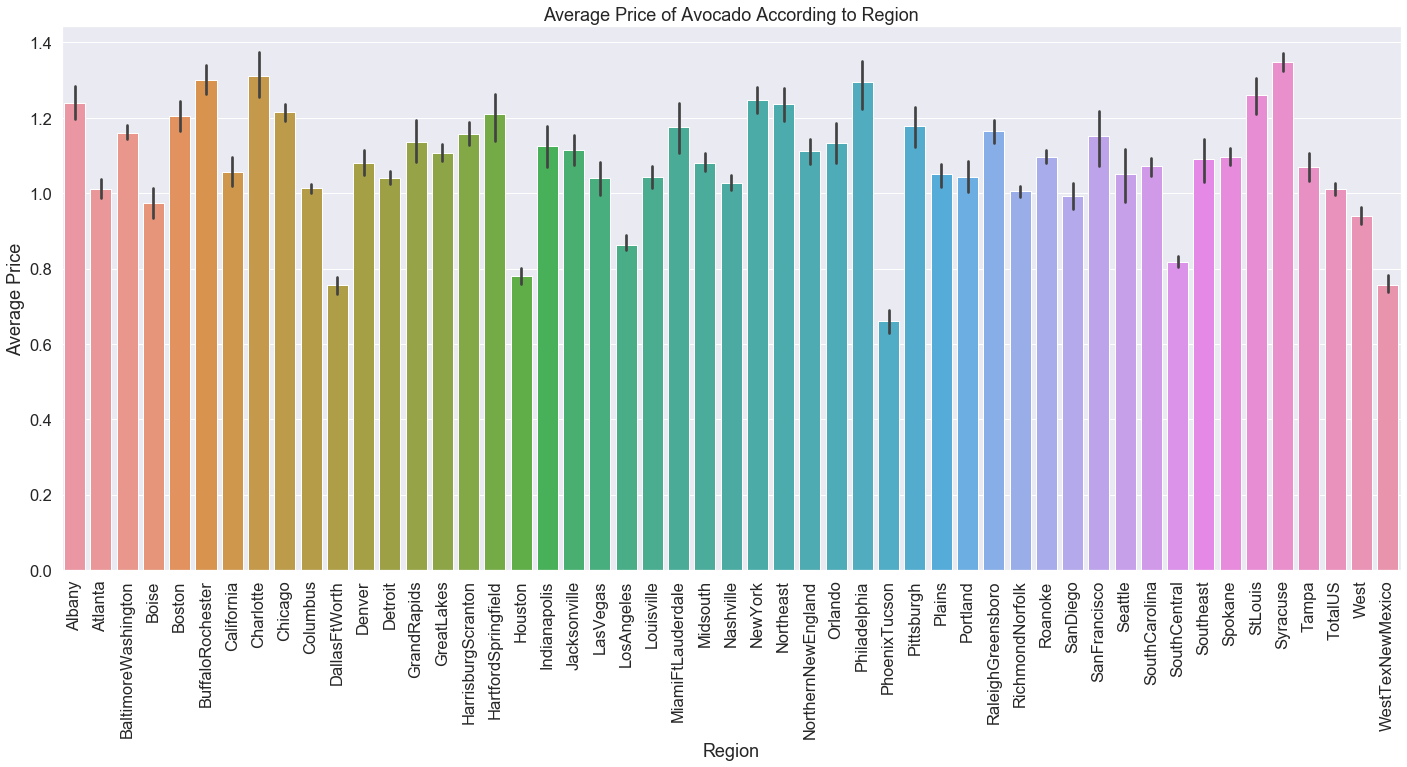

In [95]:
plt.figure(figsize=(24,10))
sns.barplot(x='region',y='AveragePrice',data=data)
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado According to Region')


From the above graph we can see that the regions HartfordSpringfield, SanFrancisco, NewYork, Philadelphia, Sacramento have high prices and PhoenixTuscan is very low.

Text(0.5, 1.0, 'Total Volume of Avocado consumed per Region')

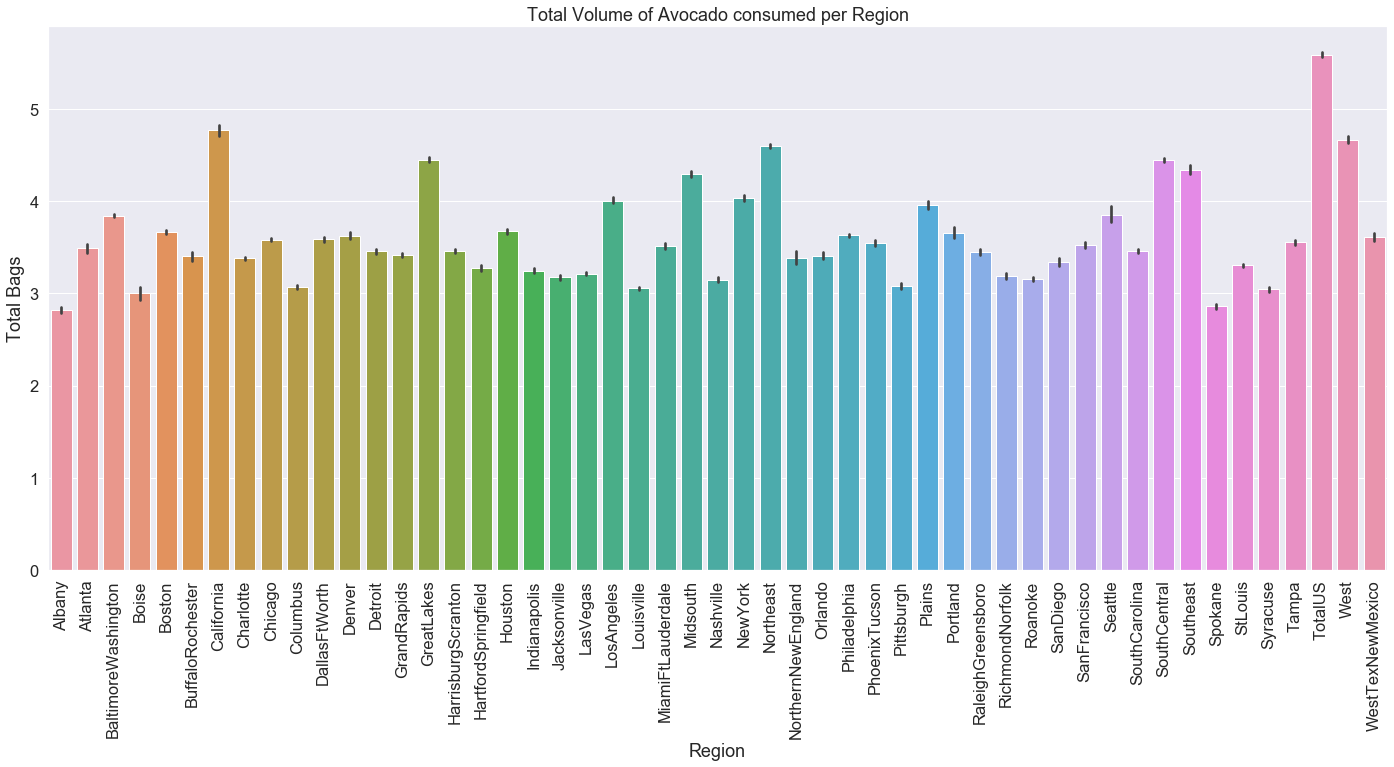

In [96]:
plt.figure(figsize=(24,10))
sns.barplot(x='region',y='Total Bags',data=data)
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Total Bags')
plt.title('Total Volume of Avocado consumed per Region')

From the above we can see that regions West, California, SouthCentral, Northeast, Southeast have the most consupmtion of avocado.

Text(0.5, 1.0, 'Average Price')

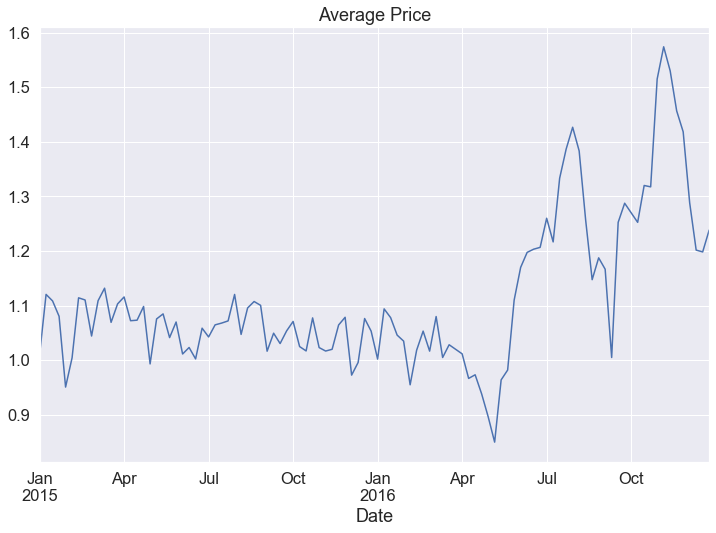

In [97]:
byDate=data.groupby('Date').mean()
plt.figure(figsize=(12,8))
byDate['AveragePrice'].plot()
plt.title('Average Price')

From the above graph we can see that their is a huge spike in price in month of July and December.

## Lets treat our categorical features

In [12]:
data['region'].nunique()

51

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 12 columns):
Date            1517 non-null datetime64[ns]
AveragePrice    1517 non-null float64
Total Volume    1517 non-null float64
4046            1517 non-null float64
4225            1517 non-null float64
4770            1517 non-null float64
Total Bags      1517 non-null float64
Small Bags      1517 non-null float64
Large Bags      1517 non-null float64
XLarge Bags     1517 non-null float64
year            1517 non-null float64
region          1517 non-null object
dtypes: datetime64[ns](1), float64(10), object(1)
memory usage: 142.3+ KB


In [14]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
data['region']=LE.fit_transform(data['region'])
data['Date']=LE.fit_transform(data['Date'])

In [14]:
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,51,1.33,3.421355,2.163089,3.359126,1.538031,2.739725,2.736445,1.655198,0.0,2.328851,0
1,50,1.35,3.362009,2.062128,3.285752,1.571123,2.766926,2.763758,1.663396,0.0,2.328851,0
2,49,0.93,3.661276,2.100123,3.628944,1.718177,2.719854,2.716005,1.673841,0.0,2.328851,0
3,48,1.08,3.500870,2.184320,3.464877,1.609746,2.619699,2.612930,1.722894,0.0,2.328851,0
4,47,1.28,3.335038,2.140048,3.279153,1.617482,2.637860,2.628355,1.799324,0.0,2.328851,0


In [15]:
data['region'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50],
      dtype=int64)

In [16]:
x=data.iloc[:, data.columns != 'AveragePrice']
x.head()

,Date,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,51,3.421355,2.163089,3.359126,1.538031,2.739725,2.736445,1.655198,0.0,2.328851,0
1,50,3.362009,2.062128,3.285752,1.571123,2.766926,2.763758,1.663396,0.0,2.328851,0
2,49,3.661276,2.100123,3.628944,1.718177,2.719854,2.716005,1.673841,0.0,2.328851,0
3,48,3.500870,2.184320,3.464877,1.609746,2.619699,2.612930,1.722894,0.0,2.328851,0
4,47,3.335038,2.140048,3.279153,1.617482,2.637860,2.628355,1.799324,0.0,2.328851,0


In [17]:
y=data['AveragePrice']
y.head()

0    1.33
1    1.35
2    0.93
3    1.08
4    1.28
Name: AveragePrice, dtype: float64

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
ss=StandardScaler()
x=ss.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [19]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1213, 11), (304, 11), (1213,), (304,))

## Implementing ML Alogrith to predict the average price

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import cross_val_score

In [21]:
LR=LinearRegression()
LA=Lasso()
RI=Ridge()
DTR=DecisionTreeRegressor(random_state=40)
KNR=KNeighborsRegressor()
ABR=AdaBoostRegressor(random_state=40)
RFR=RandomForestRegressor(random_state=40)
GBR=GradientBoostingRegressor(random_state=40)

In [22]:
models=[]
models.append(("LinearRegression",LR))
models.append(("Lasso",LA))
models.append(("Ridge",RI))
models.append(("DecisionTreeRegressor",DTR))
models.append(("AdaBoostRegressor",ABR))
models.append(("RandomForestRegressor",RFR))
models.append(("GradientBoostingRegressor",GBR))

In [23]:
Model=[]
R2_score=[]
cvs=[]
MSE=[]
MAE=[]
RMSE=[]
for name,model in models:
    print('------------------------------------->',name,'<-------------------------------')
    print(model)
    Model.append(name)
    model.fit(x_train,y_train)
    pr=model.predict(x_test)
    r2=r2_score(y_test,pr)
    print('R2_score = ',r2)
    R2_score.append(r2)
    mse=mean_squared_error(y_test,pr)
    print("Mean_Squared_Error =",mse)
    MSE.append(mse)
    mae=mean_absolute_error(y_test,pr)
    print("Mean_Absolute_Error =",mae)
    MAE.append(mae)
    rmse=np.sqrt(mse)
    print("Root_Mean_Squared_Error =",rmse)
    RMSE.append(rmse)
    score= cross_val_score(model,x,y,cv=10,scoring='r2').mean()
    print('Cross_Val_Score = ',score)
    cvs.append(score)
    print('\n')

-------------------------------------> LinearRegression <-------------------------------
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
R2_score =  0.4015203821275284
Mean_Squared_Error = 0.022802476891428024
Mean_Absolute_Error = 0.11515987205428502
Root_Mean_Squared_Error = 0.15100489028977845
Cross_Val_Score =  0.015027721741409327


-------------------------------------> Lasso <-------------------------------
Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
R2_score =  -0.0012641448605286154
Mean_Squared_Error = 0.03814883889707119
Mean_Absolute_Error = 0.14427411919121794
Root_Mean_Squared_Error = 0.19531727751807107
Cross_Val_Score =  -0.2292630304929663


-------------------------------------> Ridge <-------------------------------
Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
     

In [24]:
result = pd.DataFrame({'Model': Model, 'R2_score': R2_score ,'Mean_Squared_Error' :MSE,'Mean_Absolute_Error' :MAE,'Root_Mean_Squared_Error' :RMSE,'Cross_val_score':cvs})
result

,Model,R2_score,Mean_Squared_Error,Mean_Absolute_Error,Root_Mean_Squared_Error,Cross_val_score
0,LinearRegression,0.401520,0.022802,0.115160,0.151005,0.015028
1,Lasso,-0.001264,0.038149,0.144274,0.195317,-0.229263
2,Ridge,0.403855,0.022714,0.114815,0.150710,0.021842
3,DecisionTreeRegressor,0.791342,0.007950,0.064605,0.089163,-0.415386
4,AdaBoostRegressor,0.688649,0.011863,0.087249,0.108916,0.206016
5,RandomForestRegressor,0.874231,0.004792,0.052711,0.069223,0.005611
6,GradientBoostingRegressor,0.825079,0.006665,0.064030,0.081637,0.275454


From the above data we can see that the Random Forest Regressor is working as the best model as R2_score and Mean_Squred_Error is lowest, lets try hyper tunning the model to see if we can get a beter result

In [25]:
from sklearn.model_selection import GridSearchCV
parameter = { 
            "n_estimators"      : [10,50,100,150,200],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,3,4,5,8,10],
            "bootstrap": [True, False],
            }
grid = GridSearchCV(RFR, param_grid=parameter, n_jobs=-1, cv=10)
grid.fit(x_train, y_train)

F:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=10, n_jobs=None,
                                             oob_score=False, random_state=40,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'bootstrap': [True, False],
          

In [26]:
grid.best_score_ , grid.best_params_

(0.8493909229832471,
 {'bootstrap': False,
  'max_features': 'sqrt',
  'min_samples_split': 3,
  'n_estimators': 150})

Even from Hyperparameter tunning we are not getting any beter score, so we select Random Forest Classifier as our final model with previous parameters.

In [32]:
from sklearn.externals import joblib
joblib.dump(RFR,'Avocado_AveragePrice_Regression.obj')

['Avocado_AveragePrice_Regression.obj']

In [34]:
model=joblib.load('Avocado_AveragePrice_Regression.obj')

In [35]:
model.predict(x_test)

array([0.853, 1.214, 1.301, 0.571, 1.11 , 0.953, 1.241, 1.164, 1.011,
       1.148, 1.047, 1.162, 1.029, 0.97 , 1.375, 1.215, 0.809, 1.004,
       1.419, 1.123, 1.024, 1.137, 0.906, 1.139, 1.088, 1.104, 1.205,
       1.035, 1.264, 1.067, 1.079, 0.748, 0.961, 1.047, 0.754, 1.009,
       1.246, 1.053, 1.106, 1.126, 1.171, 1.277, 1.174, 1.1  , 1.157,
       1.073, 1.069, 1.084, 1.066, 1.081, 1.389, 1.081, 0.76 , 1.104,
       1.169, 1.01 , 1.31 , 1.069, 1.11 , 1.128, 0.865, 1.217, 0.818,
       0.764, 1.124, 1.123, 1.037, 1.069, 0.956, 0.781, 1.155, 1.076,
       0.979, 0.859, 0.779, 1.31 , 1.058, 0.869, 0.92 , 1.127, 1.082,
       1.122, 1.348, 1.245, 1.114, 1.051, 0.647, 1.034, 1.091, 1.165,
       0.712, 1.179, 1.278, 0.802, 1.098, 1.165, 1.082, 0.952, 1.364,
       1.116, 1.556, 1.159, 1.156, 1.089, 1.003, 1.099, 1.042, 1.101,
       1.17 , 0.909, 0.619, 0.998, 1.229, 1.015, 1.102, 1.002, 1.077,
       1.191, 1.054, 0.767, 1.114, 1.259, 1.047, 1.086, 1.039, 1.102,
       1.156, 1.036,

## Now Lets implement the ML Algorithm to predict the region

In [27]:
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,51,1.33,3.421355,2.163089,3.359126,1.538031,2.739725,2.736445,1.655198,0.0,2.328851,0
1,50,1.35,3.362009,2.062128,3.285752,1.571123,2.766926,2.763758,1.663396,0.0,2.328851,0
2,49,0.93,3.661276,2.100123,3.628944,1.718177,2.719854,2.716005,1.673841,0.0,2.328851,0
3,48,1.08,3.500870,2.184320,3.464877,1.609746,2.619699,2.612930,1.722894,0.0,2.328851,0
4,47,1.28,3.335038,2.140048,3.279153,1.617482,2.637860,2.628355,1.799324,0.0,2.328851,0


In [29]:
xc=data.iloc[:,:-1]
xc.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
0,51,1.33,3.421355,2.163089,3.359126,1.538031,2.739725,2.736445,1.655198,0.0,2.328851
1,50,1.35,3.362009,2.062128,3.285752,1.571123,2.766926,2.763758,1.663396,0.0,2.328851
2,49,0.93,3.661276,2.100123,3.628944,1.718177,2.719854,2.716005,1.673841,0.0,2.328851
3,48,1.08,3.500870,2.184320,3.464877,1.609746,2.619699,2.612930,1.722894,0.0,2.328851
4,47,1.28,3.335038,2.140048,3.279153,1.617482,2.637860,2.628355,1.799324,0.0,2.328851


In [37]:
yc=data['region']
yc.head()

0    0
1    0
2    0
3    0
4    0
Name: region, dtype: int32

In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
ss=StandardScaler()
xc=ss.fit_transform(x)
xc_train,xc_test,yc_train,yc_test=train_test_split(xc,yc,test_size=0.2,random_state=40)

In [58]:
xc_train.shape,xc_test.shape,yc_train.shape,yc_test.shape

((1213, 11), (304, 11), (1213,), (304,))

In [62]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score

In [68]:
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(yc_test,pre, average="macro"):
    LB = LabelBinarizer()
    LB.fit(yc_test)
    yc_test = LB.transform(yc_test)
    pre = LB.transform(pre)
    return roc_auc_score(yc_test, pre, average=average)

In [87]:
models = []
models.append(('KNeighborsClassifier', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
models.append(('RandomForestClassifier', RandomForestClassifier(n_estimators=150)))
models.append(('GradientBoostingClassifier', GradientBoostingClassifier(n_estimators=150)))
models.append(('ExtraTreesClassifier',ExtraTreesClassifier(n_estimators=150)))
models.append(('AdaBoostClassifier',AdaBoostClassifier(n_estimators=150)))

In [89]:
Model = []
scores = []
cvs=[]
roc=[]
for name, model in models:
    model.fit(xc_train, yc_train)
    yc_pred = model.predict(xc_test)
    scores.append(accuracy_score(yc_test, yc_pred))
    re = cross_val_score(model, xc, yc, cv=10, scoring='accuracy').mean()
    roc.append(multiclass_roc_auc_score(yc_test,yc_pred))
    cvs.append(re)
    Model.append(name)
result = pd.DataFrame({'Model': Model, 'Accuracy_score': scores ,'Cross_val_score':cvs,'Roc_auc_score':roc})
result

,Model,Accuracy_score,Cross_val_score,Roc_auc_score
0,KNeighborsClassifier,0.976974,0.963498,0.989270
1,SVC,0.976974,0.973528,0.989269
2,DecisionTreeClassifier,0.980263,0.964840,0.983819
3,RandomForestClassifier,1.000000,0.998565,1.000000
4,GradientBoostingClassifier,0.960526,0.961070,0.972384
5,ExtraTreesClassifier,1.000000,1.000000,1.000000
6,AdaBoostClassifier,0.190789,0.428881,0.553784


From the Above we can see that the RandomForestClassifier and ExtraTreeClassifier both are performing best, but we choose ExtraTreeClassifier as final model as the Crossval score and ROC_auc_score is also high. 

In [90]:
from sklearn.externals import joblib
joblib.dump(ETC,"Model_Avacado_Region.obj")

['Model_Avacado_Region.obj']

In [91]:
model=joblib.load("Model_Avacado_Region.obj")

In [92]:
model.predict(x_test)

array([50,  4, 26, 31,  0, 47, 29, 44,  9, 34, 14,  2,  9,  1, 30, 27, 42,
       36,  7, 44,  1,  6, 38, 18,  1, 37,  2,  9, 46, 24, 25, 17,  1, 14,
       10, 36, 16, 12,  0, 41,  4, 46,  0, 47,  2, 20, 12, 12, 41, 25, 26,
       14, 17, 23,  2, 48,  5, 12, 13, 29, 38,  8, 17, 50, 14, 22, 25, 19,
       38, 17,  3, 43, 49,  3, 10,  5,  9,  3, 42, 44,  1,  3,  7, 19, 47,
       38, 31, 48, 33,  7, 50, 15, 13, 50,  3, 15,  4, 33, 30, 44,  0,  2,
       47, 38, 47,  1,  9, 11, 19,  6, 31, 48,  8,  9, 14, 36,  1, 15,  4,
       17, 34, 13,  4,  0,  3, 11,  2,  9, 45, 50, 42, 13, 17, 49,  4, 37,
       31, 50, 16,  8, 23,  6, 28, 44,  5, 42, 45, 31, 41,  9, 26,  4,  1,
       34, 12, 41, 27, 34,  2, 17,  3, 47, 22, 49,  1,  3, 49, 22, 46,  0,
       26,  6, 16, 43,  2, 41, 50, 26,  6, 29, 37,  5,  1,  0,  7,  4,  5,
        5, 46, 31, 48, 18, 38, 39,  3, 46,  3, 22,  2, 26,  2, 31, 49,  9,
        7, 37,  0, 12, 36, 27,  4, 47, 41, 48, 12, 42, 49, 44,  5, 19, 22,
       44,  3,  0, 44, 25